In [2]:
!pip install pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 8.4 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.3 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.4 MB/s eta 0:00:00
   -----------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline
sns.set(style="whitegrid")

In [8]:
df = pd.read_csv("../data/processed/training_data.csv")


In [9]:
display(df.head())
display(df.info())
display(df.describe())

,c0f888a4-746b-49b3-97ae-dbf146ece9ea,2024-10-18,2024-10-30,Nunes,26.835.170/0001-80,26835170,0001,80,738.940.251-23,RC-99246,3720.67,EUR,Recibo,Financeiro,Despesa Operacional,Pendente,valor quitação Ducimus voluptas cumque quam voluptatem numquam pagamento labore dicta ut ratione aliquid reprehenderit.,9,0.84
0,4d0ae076-1582-4160-a382-80da1856ffa8,2023-01-03,2023-01-30,sampaio,67.832.510/0001-04,67832510,1,4,973.041.256-16,gr-108175,22515.53,brl,guia de recolhimento,tributário,despesa financeira,pago,odit animi delectus vero ipsa placeat federal ...,7,0.91
1,bd0630d1-9162-43e9-a5fd-8d8aa5386f3b,2025-02-18,NaN,gonçalves e filhos,09.364.581/0001-15,9364581,1,15,289.103.674-31,nf-870693,46483.06,brl,nota fiscal,fiscal,tributos,cancelado,ipsam ullam modi aperiam quos ducimus voluptat...,5,0.93
2,02c2384c-d526-4b96-889f-f1f30a8b0d50,2025-03-14,NaN,santos e filhos,92.605.731/0001-89,92605731,1,89,825.719.360-77,bp-373528,869785.95,usd,balanço patrimonial,contábil,investimentos,pendente,sed debitis vitae quod nulla contas aut nisi o...,10,0.92
3,6d8ea72a-c698-4a0e-8392-a8cd0c4c2c5c,2025-01-09,2026-05-27,moraes jesus - me,91.345.768/0001-52,91345768,1,52,248.736.159-09,ct-884794,147179.73,brl,contrato,jurídico,despesa operacional,pago,debitis excepturi nisi contratante veritatis v...,8,0.85
4,0bfafe65-8602-4702-9c2d-fe5b52c50de7,2025-04-30,NaN,moreira,04.952.637/0001-39,4952637,1,39,072.981.653-21,eb-415850,94005.52,usd,extrato bancário,financeiro,despesa operacional,em análise,odit laboriosam consequuntur sit perspiciatis ...,10,0.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524999 entries, 0 to 524998
Data columns (total 19 columns):
 #   Column                                                                                                                   Non-Null Count   Dtype  
---  ------                                                                                                                   --------------   -----  
 0   c0f888a4-746b-49b3-97ae-dbf146ece9ea                                                                                     524999 non-null  object 
 1   2024-10-18                                                                                                               524999 non-null  object 
 2   2024-10-30                                                                                                               262687 non-null  object 
 3   Nunes                                                                                                                    524999 n

None

,26835170,0001,80,3720.67,9,0.84
count,5.249990e+05,524999.0,524999.000000,524999.000000,524999.000000,524999.000000
mean,5.122444e+07,1.0,45.177122,122458.883767,7.499603,0.894934
std,2.835529e+07,0.0,30.551542,205963.999192,1.707649,0.054964
min,1.352946e+06,1.0,0.000000,-99994.920000,5.000000,0.800000
25%,2.745196e+07,1.0,17.000000,5585.465000,6.000000,0.850000
50%,4.931685e+07,1.0,44.000000,39041.730000,7.000000,0.890000
75%,7.581640e+07,1.0,71.000000,121878.100000,9.000000,0.940000
max,9.853025e+07,1.0,99.000000,999995.200000,10.000000,0.990000


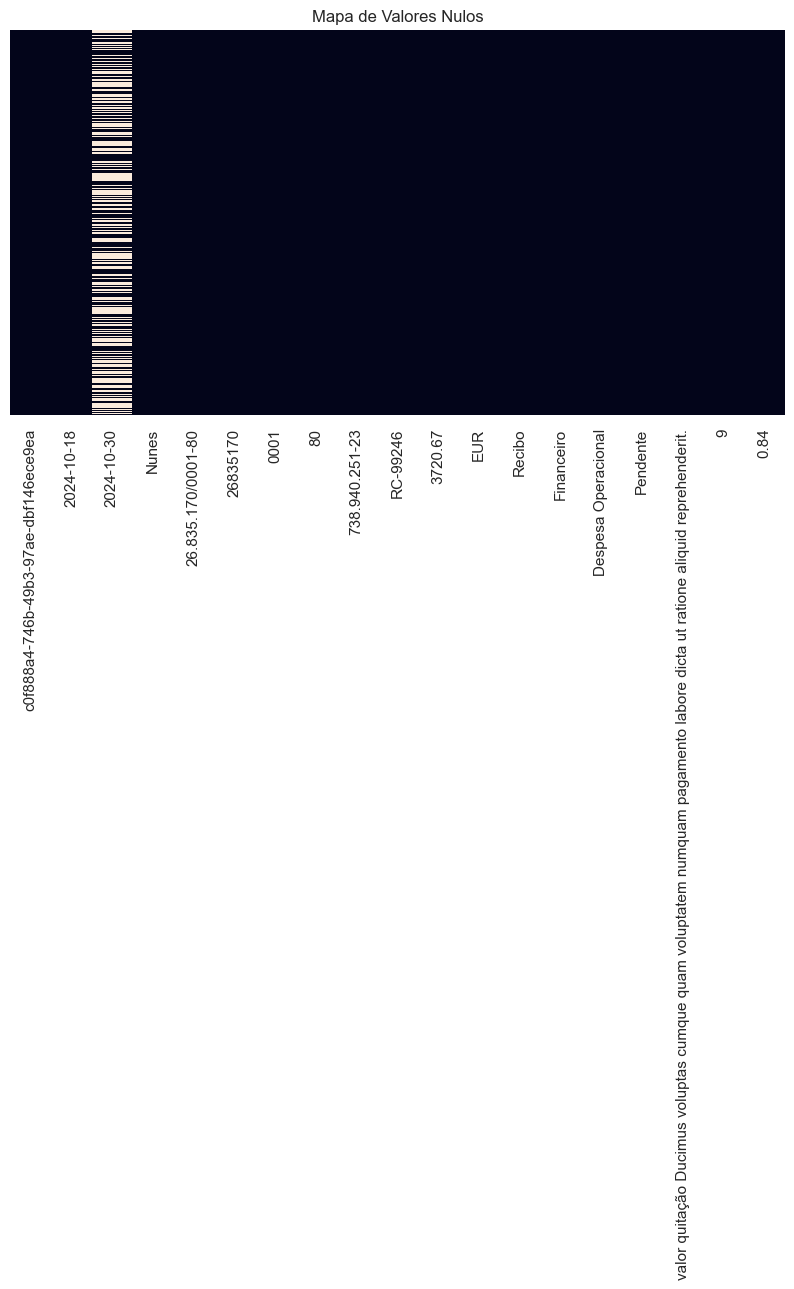

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Mapa de Valores Nulos")
plt.show()


In [11]:
if "classe" in df.columns:
    sns.countplot(x="classe", data=df)
    plt.title("Distribuição das Classes")
    plt.show()


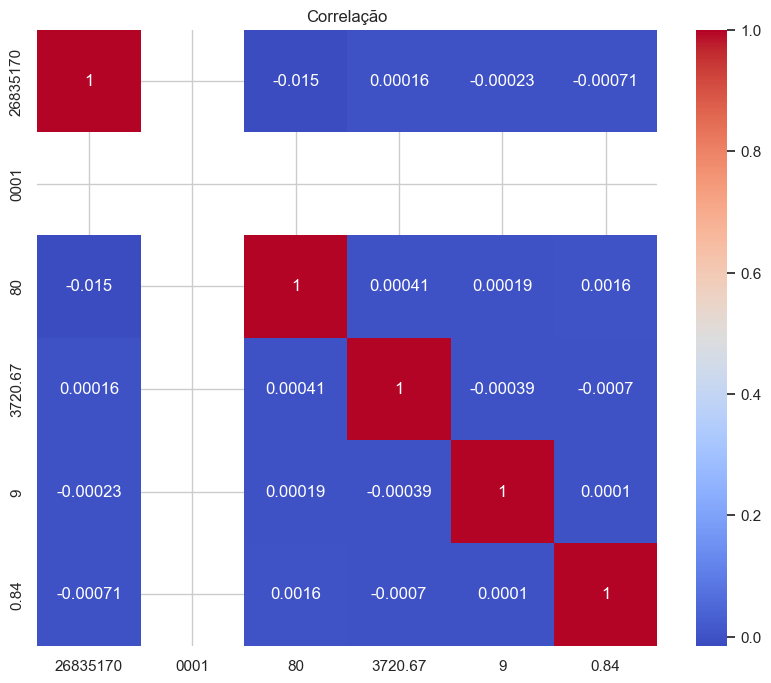

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação")
plt.show()